In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
import numpy as np
import seaborn as sns
import os
from datetime import date
import rasterio
import matplotlib.pyplot as plt
from statistics import mean
import matplotlib as mpl
import glob
import scipy
from PIL import Image
from rasterio.enums import Resampling
from rasterio.transform import Affine
import earthpy as et
import earthpy.plot as ep
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import transforms
from scipy import ndimage

In [2]:
# Change the working directory
os.chdir('/Users/f67f911/Desktop/HG2022_Data/Data')

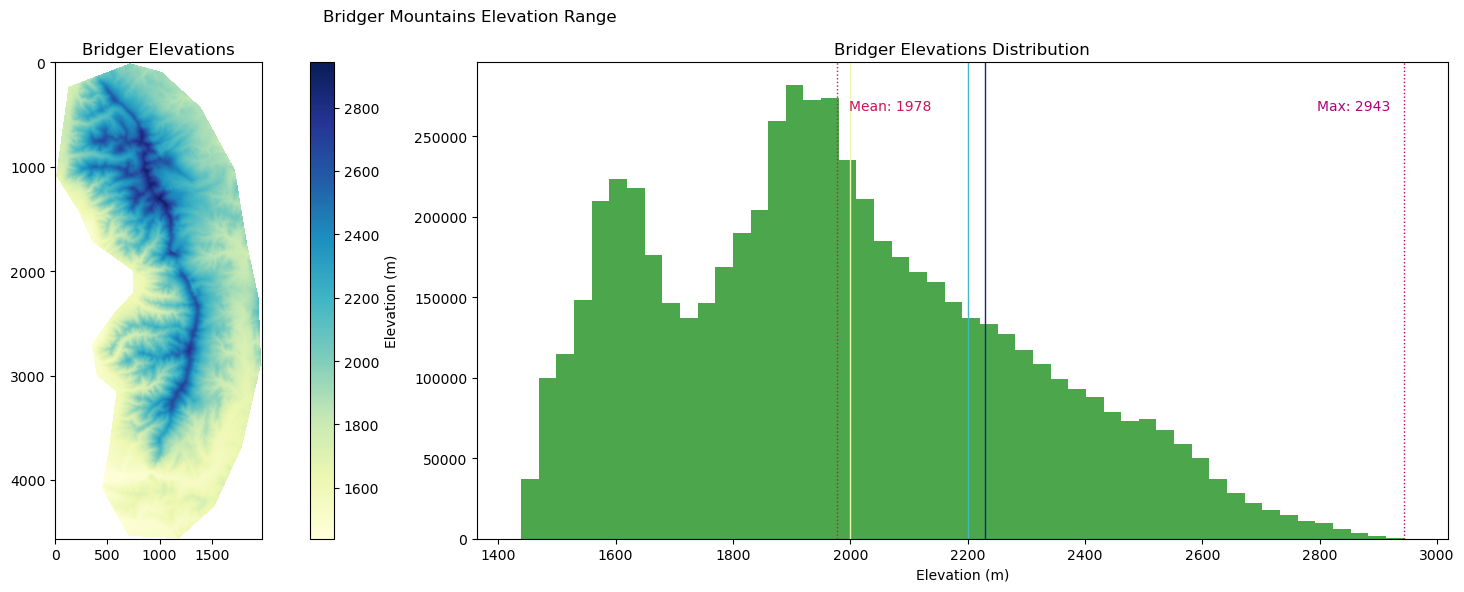

In [3]:
# Open the overview of the Bridger Mountains
Bridger_DEM = 'Bridger_DEM_Clipped.tif'
# Open the raster file using rasterio
with rasterio.open(Bridger_DEM) as src:
    # Read the raster data as a numpy array
    Bridger_DEM_data = src.read()
    # Specify the nan value 
    Bridger_DEM_data[Bridger_DEM_data == 0] = np.nan
    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_Bridger_DEM = src.meta
    transform = src.transform
    Bridger_DEM_vals = Bridger_DEM_data.flatten()
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('Bridger Mountains Elevation Range')

# Create a variable to be visualized on the first axis
img = axs[0].imshow(Bridger_DEM_data[0], cmap = 'YlGnBu', origin = "upper")
# Set the title of the first column
axs[0].set_title('Bridger Elevations')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Elevation (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Bridger_DEM_vals, bins=50, color='g', alpha=0.7) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Bridger Elevations Distribution')
# Set the xlabel
axs[1].set_xlabel('Elevation (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Bridger_DEM_vals), color='#ce1256', linestyle = 'dotted', linewidth=1)
axs[1].axvline(np.nanmax(Bridger_DEM_vals), color='#ae017e', linestyle='dotted', linewidth=1)
# # Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Bridger_DEM_vals)*1.01, max_ylim*.9, 'Mean: {:.0f}'.format(np.nanmean(Bridger_DEM_vals)), color = '#ce1256')
axs[1].text(np.nanmax(Bridger_DEM_vals)*0.95, max_ylim*.9, 'Max: {:.0f}'.format(np.nanmax(Bridger_DEM_vals)), color = '#ae017e')

# Set lines at the SNOTEL elevations
axs[1].axvline(2000, color='#edf8b1', linewidth=1)
axs[1].axvline(2200, color='#41b6c4', linewidth=1)
axs[1].axvline(2230, color='#0c2c84', linewidth=1)
# Save
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/Bridger_Elev.png', bbox_inches = "tight")

In [4]:
# Create a df from the Bridger DEM values to create a hypsometric curve
elev_df = pd.DataFrame(Bridger_DEM_vals, columns = ['elevation'])
elev_df.head()

,elevation
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


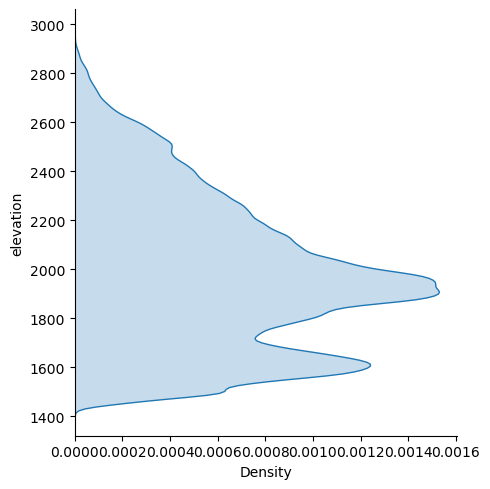

In [6]:
# Create a visual representation of the hypsometric curve of the Bridger Mountain Elevations
sns.displot(elev_df, y = 'elevation'
            , kind = 'kde',
            fill = True
           )
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/Bridger_Hypso.png')

## NOW! Let's look at the individual raster datasets for the field season

In [7]:
# Set the path for the sdepth files
sdepth_path = ('Sdepth_Rasters')

In [8]:
# View all of the snow depth files to make sure each date is represented
sdepth_files = glob.glob(sdepth_path +'/*.tif')
sdepth_files

['Sdepth_Rasters/Sdepth_Jan09.tif',
 'Sdepth_Rasters/Sdepth_Apr07.tif',
 'Sdepth_Rasters/Sdepth_Jan24.tif',
 'Sdepth_Rasters/Sdepth_Feb18.tif',
 'Sdepth_Rasters/Sdepth_Nov24.tif',
 'Sdepth_Rasters/Sdepth_May05.tif',
 'Sdepth_Rasters/Sdepth_May10.tif',
 'Sdepth_Rasters/Sdepth_Feb12.tif',
 'Sdepth_Rasters/Sdepth_May17.tif',
 'Sdepth_Rasters/Sdepth_Mar25.tif']

## The following lines of code allow you to open each raster, visualize it, and visualize the histogram distribution.

Text(3.2841552734375004, 16903.215, 'Max: 2.986')

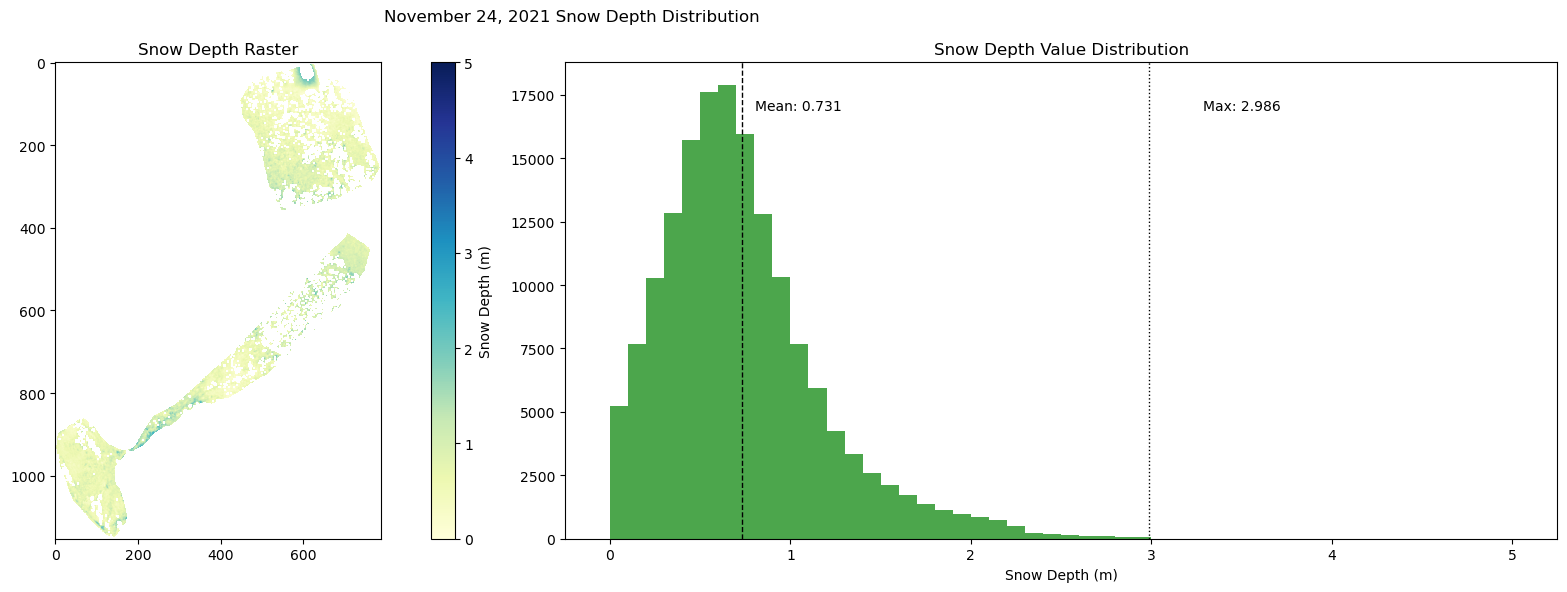

In [9]:
# Open the raster by date
sdepth_Nov24 = 'Sdepth_Rasters/Sdepth_Nov24.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Nov24) as src:
    # Read the raster data as a numpy array
    Nov24_data = src.read()
    # Specify the nan value 
    Nov24_data[Nov24_data == 3.3999999521443642e+38] = np.nan
    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_Nov24 = src.meta
    transform = src.transform
    Nov24_vals = Nov24_data.flatten()
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('November 24, 2021 Snow Depth Distribution')

# Create a variable to be visualized on the first axis
img = axs[0].imshow(Nov24_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu', origin = "upper")
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Nov24_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Nov24_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(Nov24_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Nov24_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(Nov24_vals)))
axs[1].text(np.nanmax(Nov24_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(Nov24_vals)))

In [6]:
sdepth_Jan09 = 'Sdepth_Rasters/Sdepth_Jan09.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Jan09) as src:
    # Read the raster data as a numpy array
    Jan09_data = src.read()

    Jan09_data[Jan09_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_Jan09 = src.meta
    transform = src.transform
    Jan09_vals = Jan09_data.flatten()

Text(7.677946519851685, 2742.39, 'Max: 6.980')

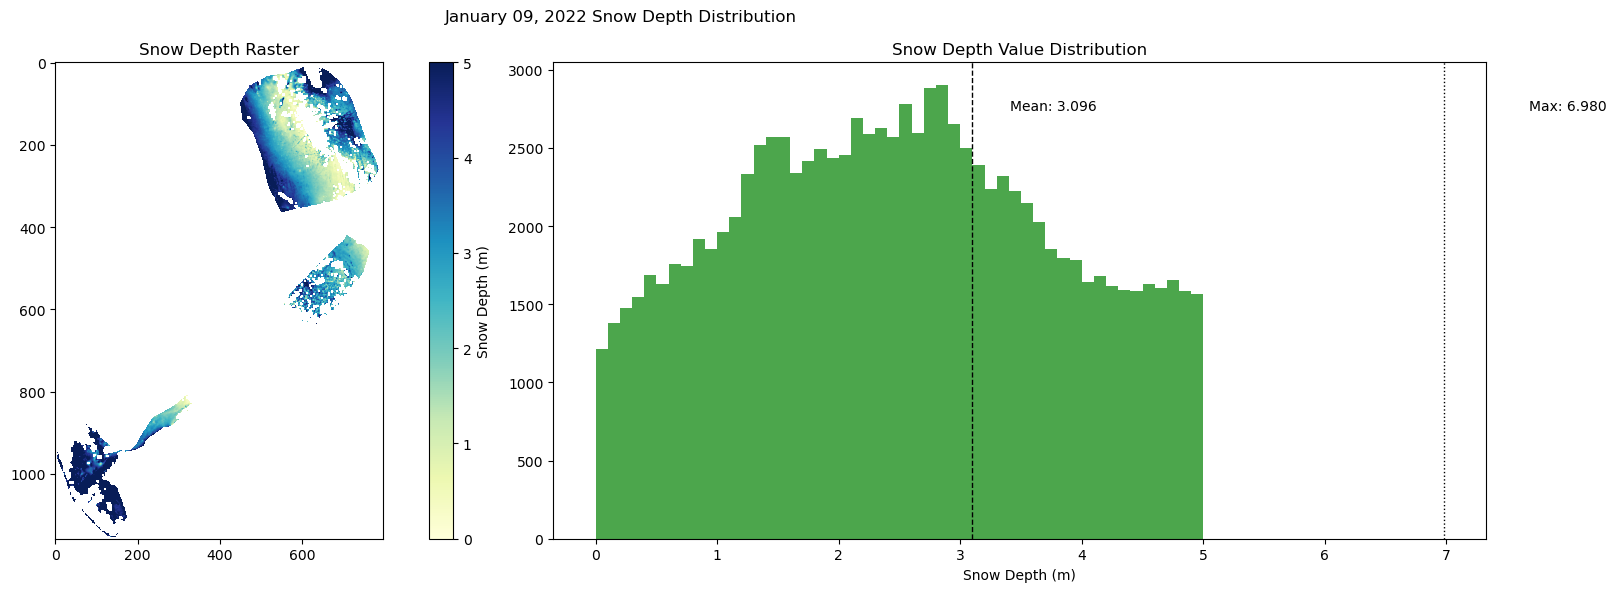

In [7]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('January 09, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(Jan09_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Jan09_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Jan09_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(Jan09_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Jan09_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(Jan09_vals)))
axs[1].text(np.nanmax(Jan09_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(Jan09_vals)))

In [8]:
sdepth_Jan24 = 'Sdepth_Rasters/Sdepth_Jan24.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Jan24) as src:
    # Read the raster data as a numpy array
    Jan24_data = src.read()

    Jan24_data[Jan24_data == 3.3999999521443642e+38] = np.nan
    Jan24_vals = Jan24_data.flatten()

Text(3.80595703125, 13558.86, 'Max: 3.460')

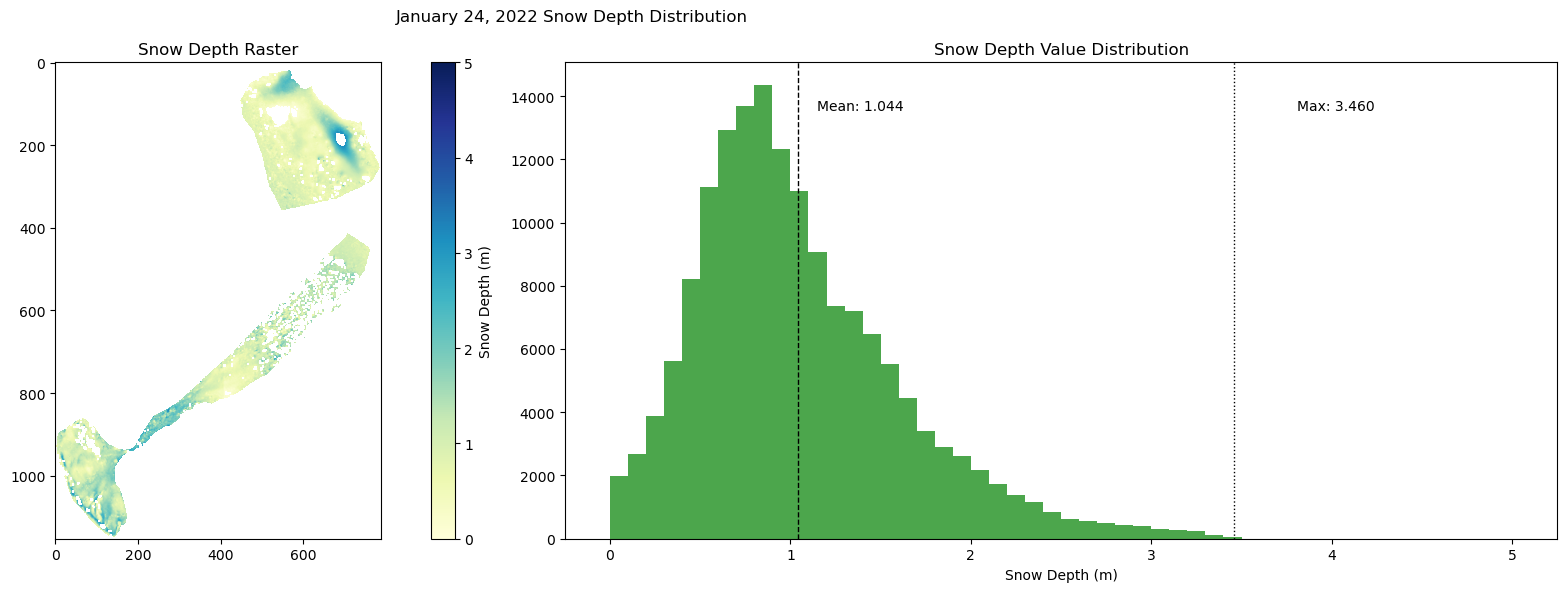

In [9]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('January 24, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(Jan24_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Jan24_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Jan24_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(Jan24_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Jan24_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(Jan24_vals)))
axs[1].text(np.nanmax(Jan24_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(Jan24_vals)))

In [10]:
sdepth_Feb12 = 'Sdepth_Rasters/Sdepth_Feb12.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Feb12) as src:
    # Read the raster data as a numpy array
    Feb12_data = src.read()

    Feb12_data[Feb12_data == 3.3999999521443642e+38] = np.nan
    Feb12_vals = Feb12_data.flatten()

Text(3.4528076171875, 20625.57, 'Max: 3.139')

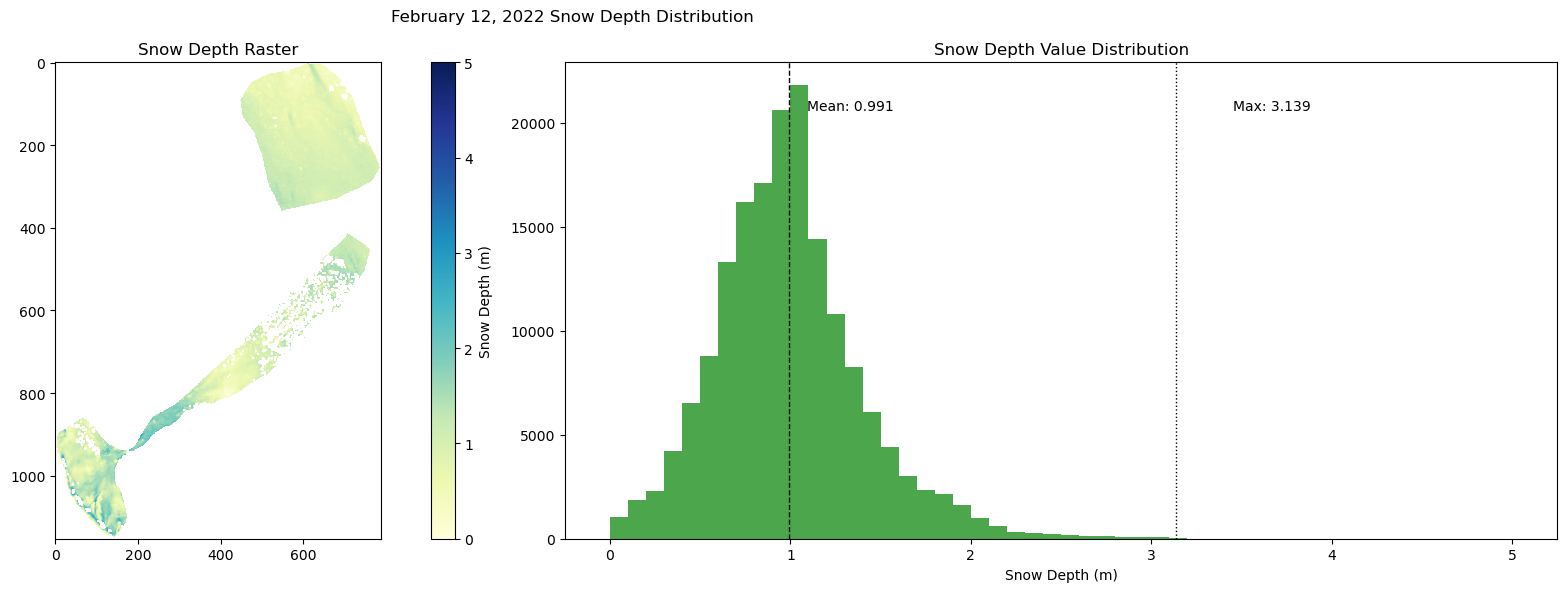

In [11]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('February 12, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(Feb12_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Feb12_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Feb12_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(Feb12_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Feb12_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(Feb12_vals)))
axs[1].text(np.nanmax(Feb12_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(Feb12_vals)))

In [12]:
sdepth_Feb18 = 'Sdepth_Rasters/Sdepth_Feb18.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Feb18) as src:
    # Read the raster data as a numpy array
    Feb18_data = src.read()

    Feb18_data[Feb18_data == 3.3999999521443642e+38] = np.nan
    Feb18_vals = Feb18_data.flatten()

Text(4.520849609375, 10109.61, 'Max: 4.110')

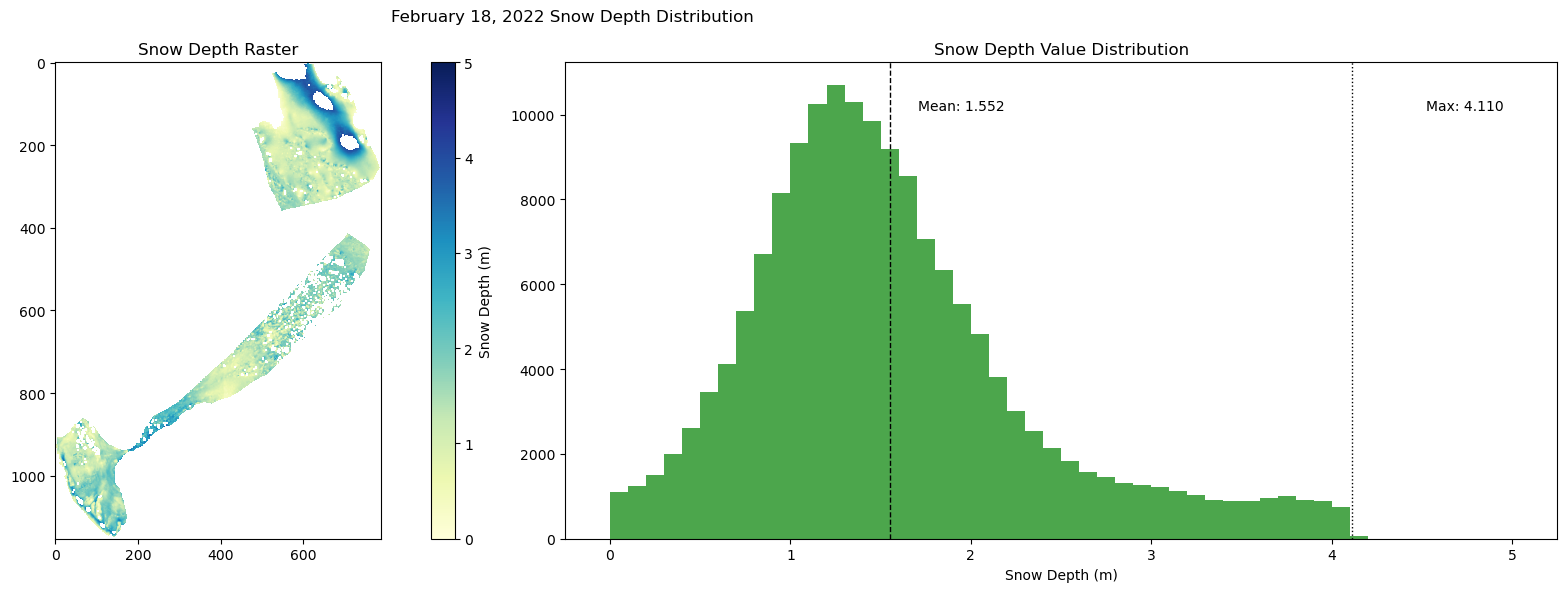

In [13]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('February 18, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(Feb18_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Feb18_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Feb18_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(Feb18_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Feb18_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(Feb18_vals)))
axs[1].text(np.nanmax(Feb18_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(Feb18_vals)))

In [14]:
sdepth_Mar25 = 'Sdepth_Rasters/Sdepth_Mar25.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Mar25) as src:
    # Read the raster data as a numpy array
    Mar25_data = src.read()

    Mar25_data[Mar25_data == 3.3999999521443642e+38] = np.nan
    Mar25_vals = Mar25_data.flatten()

Text(4.3664306640625, 20718.18, 'Max: 3.969')

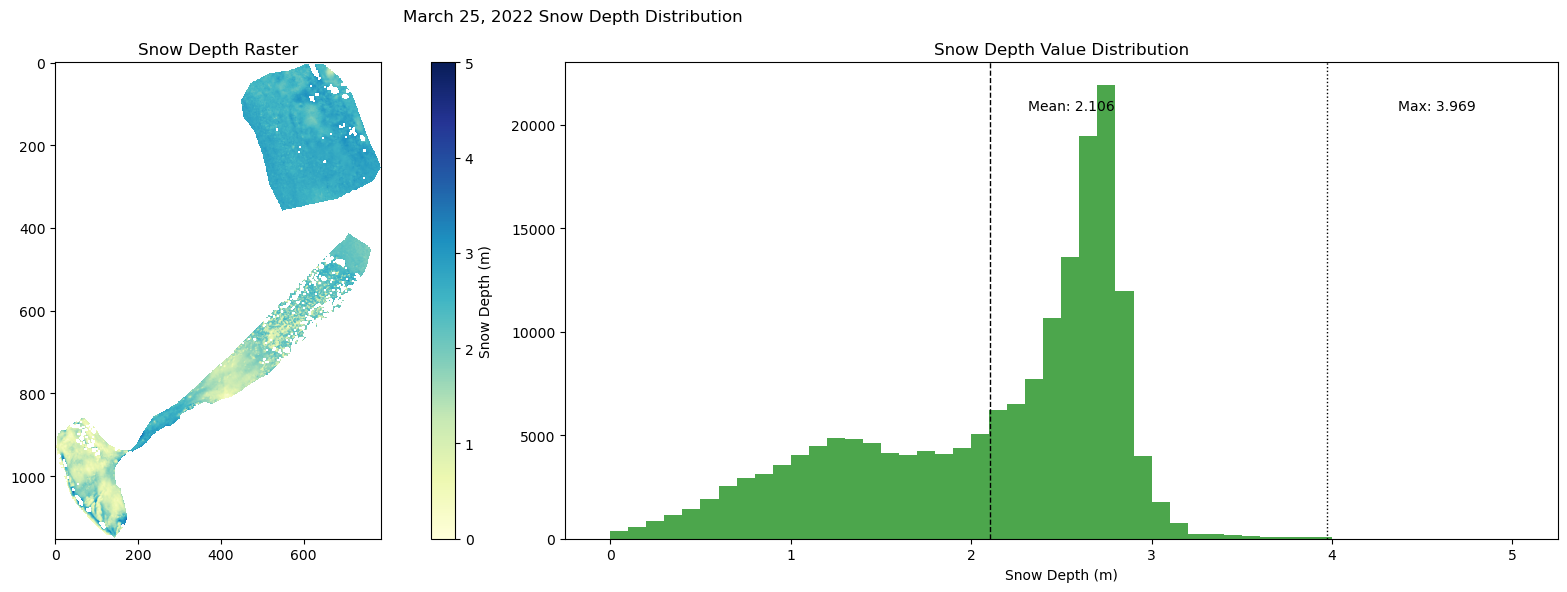

In [15]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('March 25, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(Mar25_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Mar25_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Mar25_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(Mar25_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Mar25_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(Mar25_vals)))
axs[1].text(np.nanmax(Mar25_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(Mar25_vals)))

In [16]:
sdepth_Apr07 = 'Sdepth_Rasters/Sdepth_Apr07.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_Apr07) as src:
    # Read the raster data as a numpy array
    Apr07_data = src.read()

    Apr07_data[Apr07_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_Apr07 = src.meta
    transform = src.transform
    Apr07_vals = Apr07_data.flatten()

Text(4.1574951171875005, 17194.275, 'Max: 3.780')

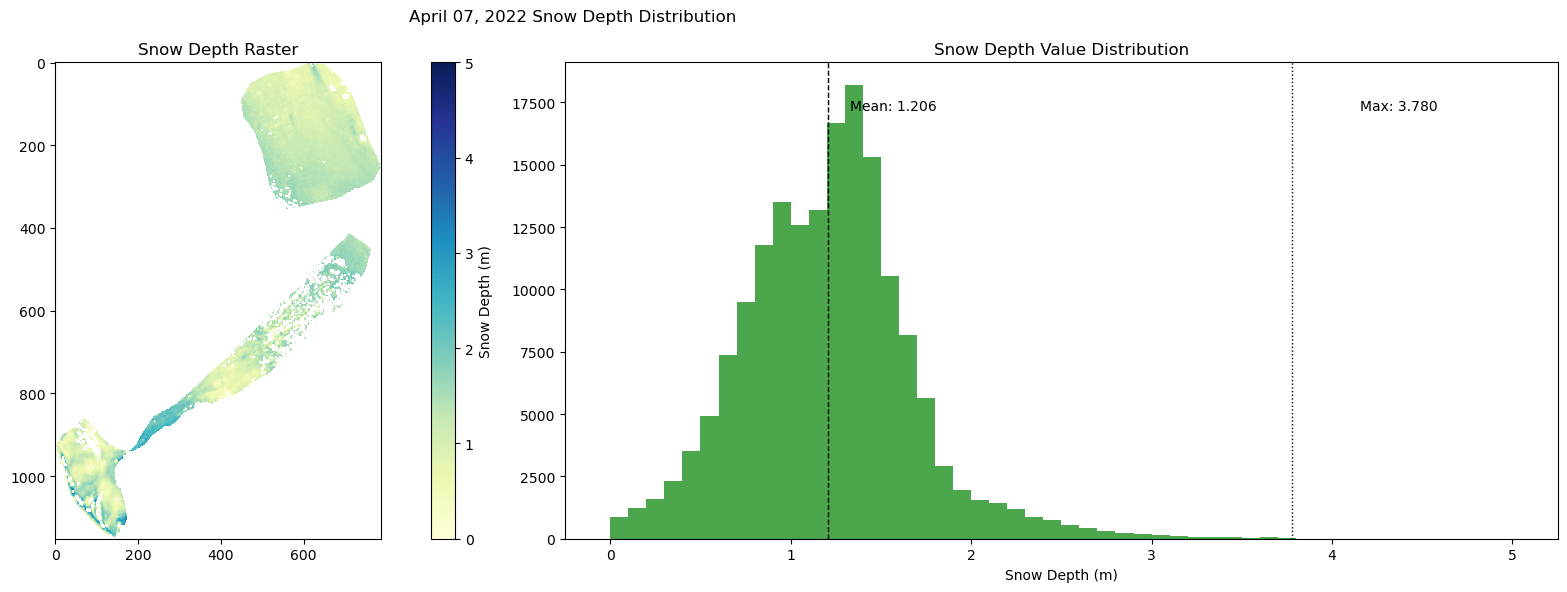

In [17]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('April 07, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(Apr07_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(Apr07_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(Apr07_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(Apr07_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(Apr07_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(Apr07_vals)))
axs[1].text(np.nanmax(Apr07_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(Apr07_vals)))

In [18]:
sdepth_May05 = 'Sdepth_Rasters/Sdepth_May05.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_May05) as src:
    # Read the raster data as a numpy array
    May05_data = src.read()

    May05_data[May05_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_May05 = src.meta
    transform = src.transform
    May05_vals = May05_data.flatten()

Text(4.3449462890625, 17193.33, 'Max: 3.950')

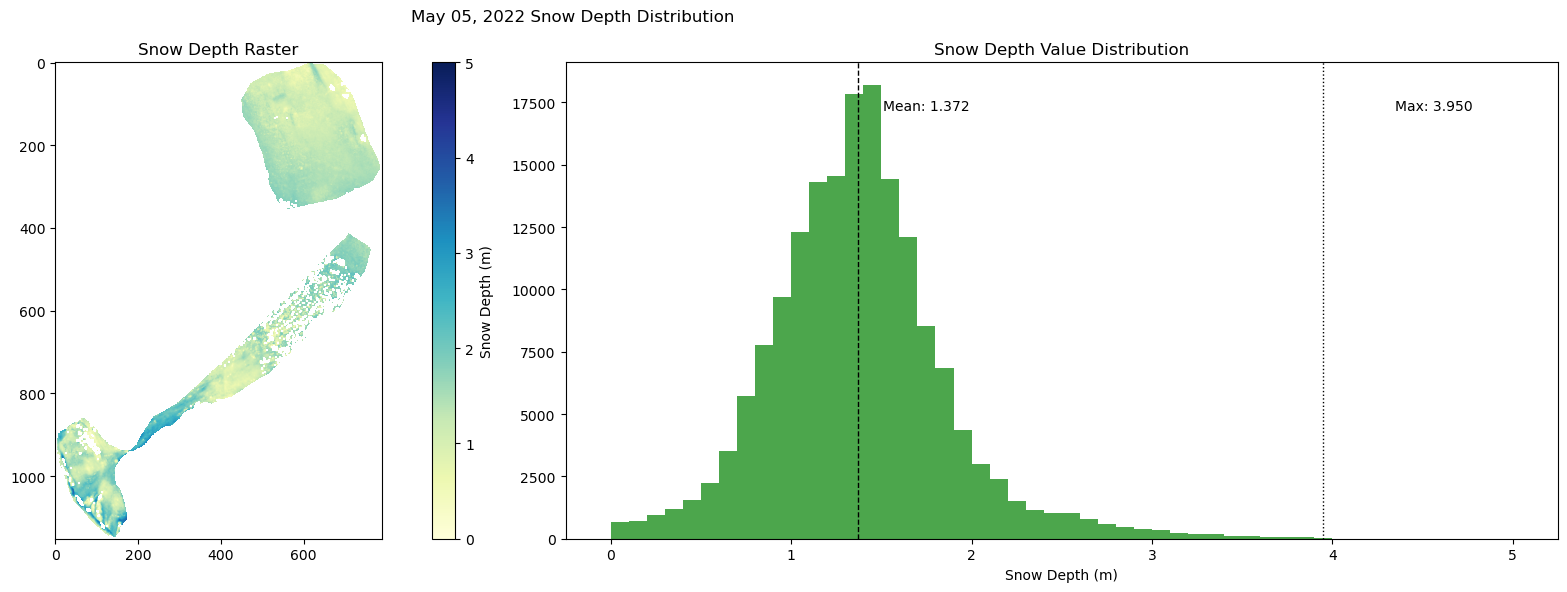

In [19]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('May 05, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(May05_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(May05_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(May05_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(May05_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(May05_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(May05_vals)))
axs[1].text(np.nanmax(May05_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(May05_vals)))

In [20]:
sdepth_May10 = 'Sdepth_Rasters/Sdepth_May10.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_May10) as src:
    # Read the raster data as a numpy array
    May10_data = src.read()

    May10_data[May10_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_May10 = src.meta
    transform = src.transform
    May10_vals = May10_data.flatten()

Text(4.9110595703125, 17193.33, 'Max: 4.465')

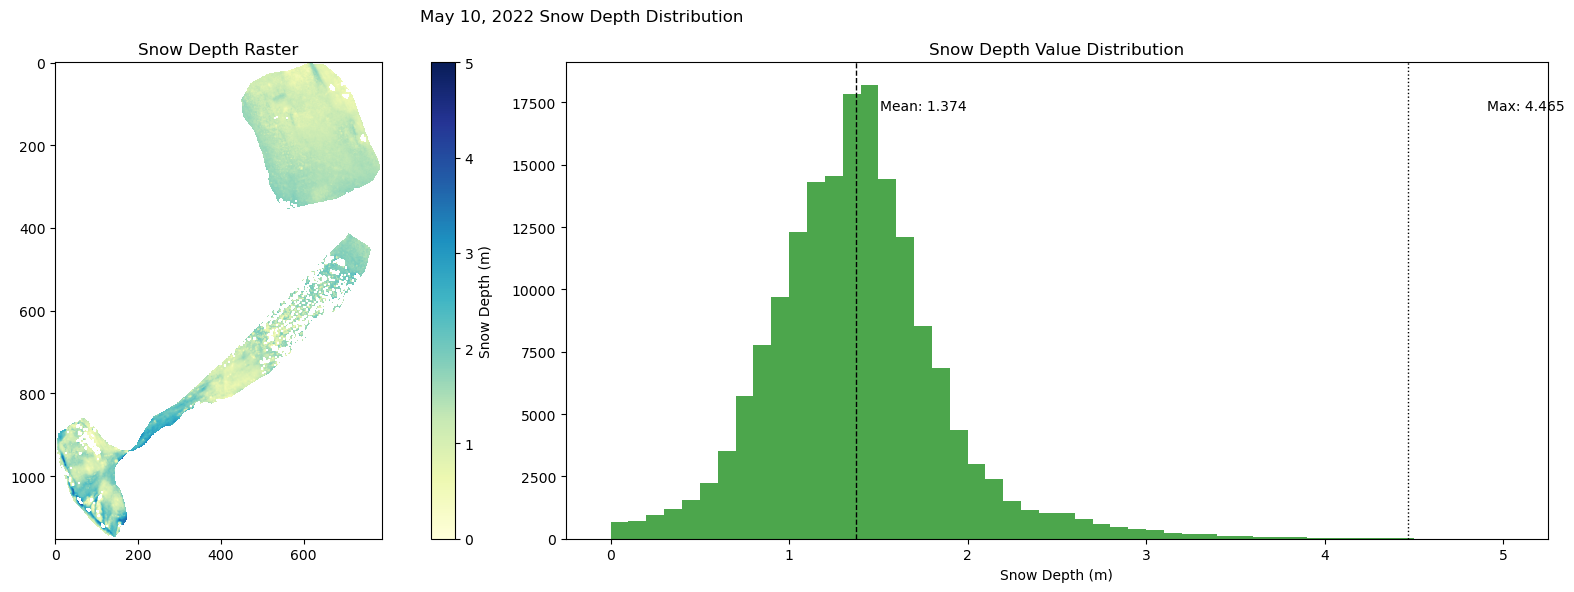

In [21]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('May 10, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(May10_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(May10_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(May10_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(May10_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(May10_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(May10_vals)))
axs[1].text(np.nanmax(May10_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(May10_vals)))

In [22]:
sdepth_May17 = 'Sdepth_Rasters/Sdepth_May17.tif'
# Open the raster file using rasterio
with rasterio.open(sdepth_May17) as src:
    # Read the raster data as a numpy array
    May17_data = src.read()

    May17_data[May17_data == 3.3999999521443642e+38] = np.nan

    # Access the geospatial metadata
    # The metadata contains information like projection, transform, etc.
    metadata_May17 = src.meta
    transform = src.transform
    May17_vals = May17_data.flatten()

Text(5.645825195312501, 12556.215, 'Max: 5.133')

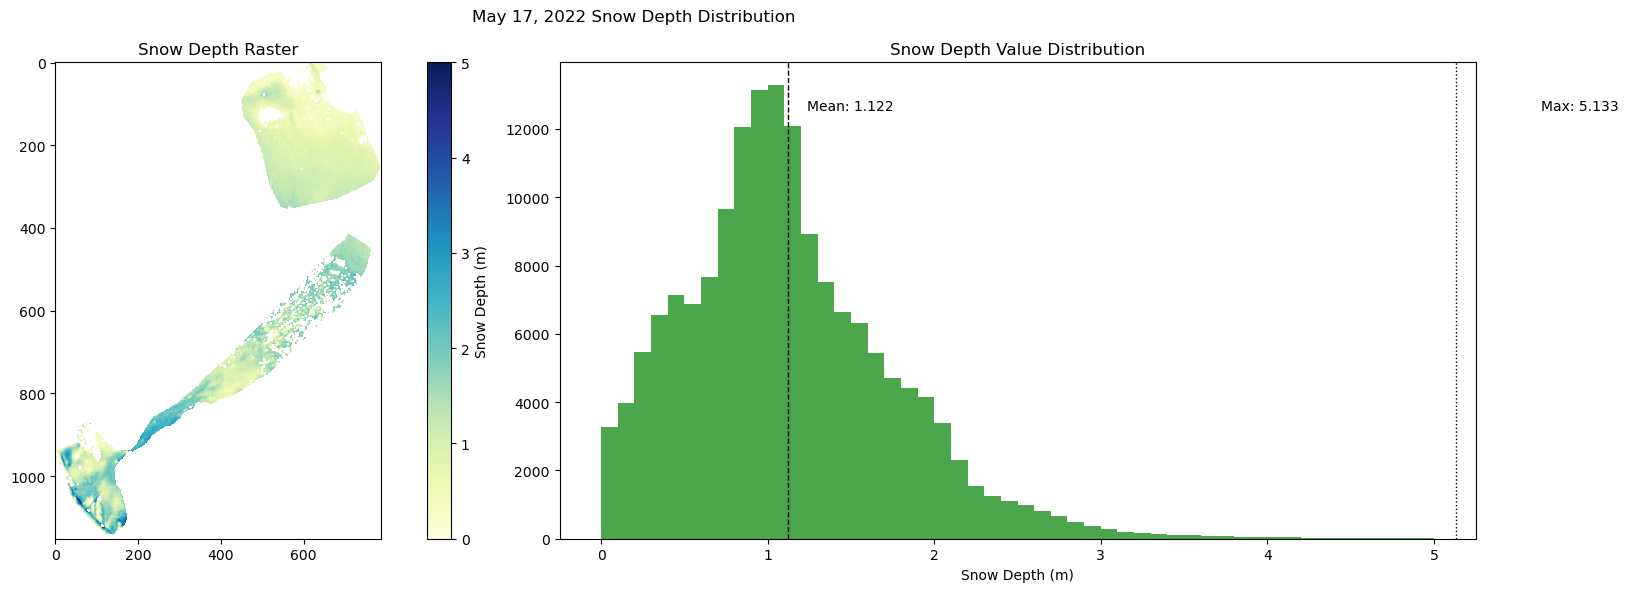

In [23]:
# Plot the raster value and the histogram of values
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (20,6))
# Create an overall Figure Title
fig.suptitle('May 17, 2022 Snow Depth Distribution')
# Create a variable to be visualized on the first axis
img = axs[0].imshow(May17_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
# Set the title of the first column
axs[0].set_title('Snow Depth Raster')
# Plot a colorbar for the snow depth data
fig.colorbar(img, ax = axs[0],label = 'Snow Depth (m)')

# Set the data for the histogram of snow depth values to be displayed in the second column
axs[1].hist(May17_vals, bins=50, color='g', alpha=0.7,range=[0,5]) # You can adjust the number of bins as needed
# Set title
axs[1].set_title('Snow Depth Value Distribution')
# Set the xlabel
axs[1].set_xlabel('Snow Depth (m)')
# Add dashed and dotted line for the mean snow depth and the max
axs[1].axvline(np.nanmean(May17_vals), color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(np.nanmax(May17_vals), color='k', linestyle='dotted', linewidth=1)
# Capture the limits of the plot axis
min_ylim, max_ylim = plt.ylim()
# Add text describing the two lines
axs[1].text(np.nanmean(May17_vals)*1.1, max_ylim*.9, 'Mean: {:.3f}'.format(np.nanmean(May17_vals)))
axs[1].text(np.nanmax(May17_vals)*1.1, max_ylim*.9, 'Max: {:.3f}'.format(np.nanmax(May17_vals)))

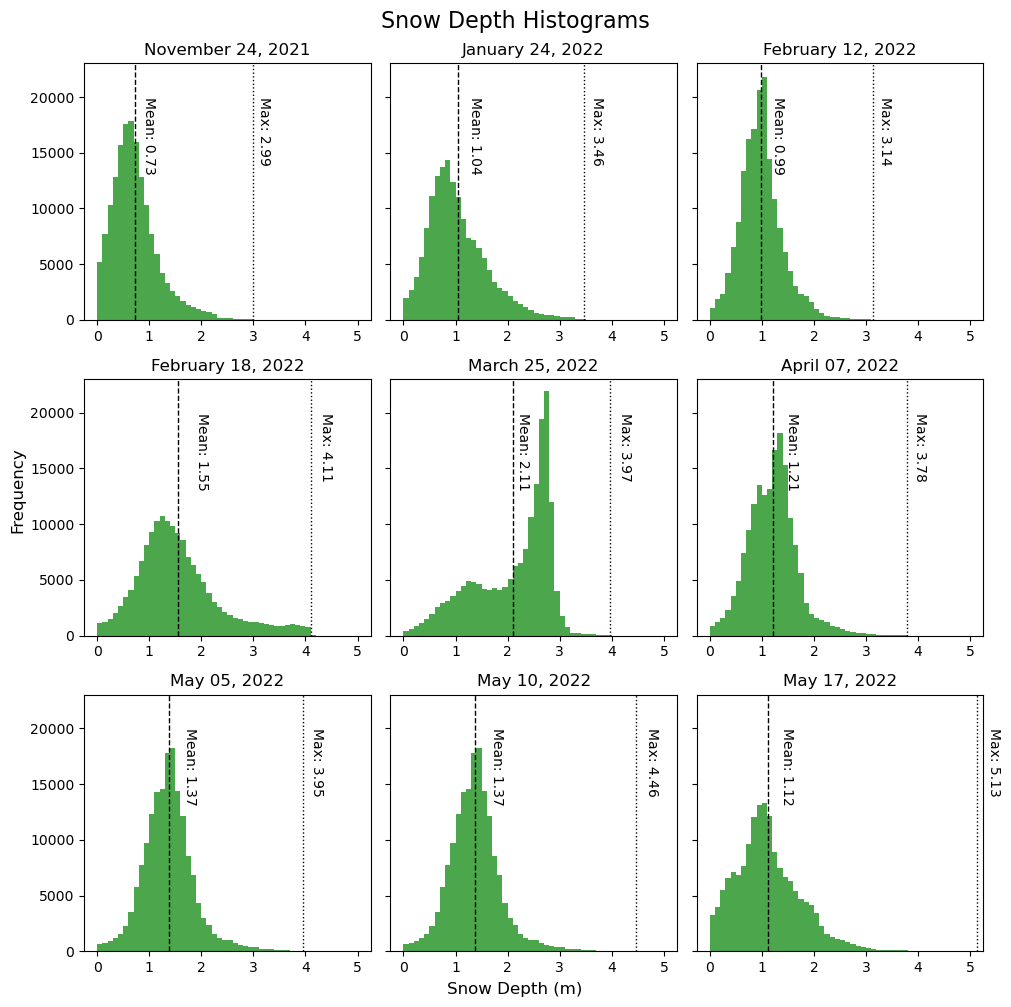

In [24]:
# Plot the histograms of each raster in a 3 x 3 layout for each usable day
fig, axs = plt.subplots(3,3, tight_layout = True, figsize = (10,10), sharey = True)
# Create an overall Figure Title
fig.suptitle('Snow Depth Histograms', fontsize = 16)

# Graph each date on the axis
axs[0,0].hist(Nov24_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[0,0].set_title('November 24, 2021')
axs[0,0].axvline(np.nanmean(Nov24_vals), color='k', linestyle='dashed', linewidth=1)
axs[0,0].axvline(np.nanmax(Nov24_vals), color='k', linestyle='dotted', linewidth=1)
axs[0,0].text(np.nanmean(Nov24_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(Nov24_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[0,0].text(np.nanmax(Nov24_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(Nov24_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[0,1].hist(Jan24_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[0,1].set_title('January 24, 2022')
axs[0,1].axvline(np.nanmean(Jan24_vals), color='k', linestyle='dashed', linewidth=1)
axs[0,1].axvline(np.nanmax(Jan24_vals), color='k', linestyle='dotted', linewidth=1)
axs[0,1].text(np.nanmean(Jan24_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(Jan24_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[0,1].text(np.nanmax(Jan24_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(Jan24_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[0,2].hist(Feb12_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[0,2].set_title('February 12, 2022')
axs[0,2].axvline(np.nanmean(Feb12_vals), color='k', linestyle='dashed', linewidth=1)
axs[0,2].axvline(np.nanmax(Feb12_vals), color='k', linestyle='dotted', linewidth=1)
axs[0,2].text(np.nanmean(Feb12_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(Feb12_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[0,2].text(np.nanmax(Feb12_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(Feb12_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[1,0].hist(Feb18_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[1,0].set_title('February 18, 2022')
axs[1,0].axvline(np.nanmean(Feb18_vals), color='k', linestyle='dashed', linewidth=1)
axs[1,0].axvline(np.nanmax(Feb18_vals), color='k', linestyle='dotted', linewidth=1)
axs[1,0].text(np.nanmean(Feb18_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(Feb18_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[1,0].text(np.nanmax(Feb18_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(Feb18_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[1,1].hist(Mar25_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[1,1].set_title('March 25, 2022')
axs[1,1].axvline(np.nanmean(Mar25_vals), color='k', linestyle='dashed', linewidth=1)
axs[1,1].axvline(np.nanmax(Mar25_vals), color='k', linestyle='dotted', linewidth=1)
axs[1,1].text(np.nanmean(Mar25_vals)*1.05, 20000, 'Mean: {:.2f}'.format(np.nanmean(Mar25_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[1,1].text(np.nanmax(Mar25_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(Mar25_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[1,2].hist(Apr07_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[1,2].set_title('April 07, 2022')
axs[1,2].axvline(np.nanmean(Apr07_vals), color='k', linestyle='dashed', linewidth=1)
axs[1,2].axvline(np.nanmax(Apr07_vals), color='k', linestyle='dotted', linewidth=1)
axs[1,2].text(np.nanmean(Apr07_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(Apr07_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[1,2].text(np.nanmax(Apr07_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(Apr07_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[2,0].hist(May05_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[2,0].set_title('May 05, 2022')
axs[2,0].axvline(np.nanmean(May05_vals), color='k', linestyle='dashed', linewidth=1)
axs[2,0].axvline(np.nanmax(May05_vals), color='k', linestyle='dotted', linewidth=1)
axs[2,0].text(np.nanmean(May05_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(May05_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[2,0].text(np.nanmax(May05_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(May05_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[2,1].hist(May10_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[2,1].set_title('May 10, 2022')
axs[2,1].axvline(np.nanmean(May10_vals), color='k', linestyle='dashed', linewidth=1)
axs[2,1].axvline(np.nanmax(May10_vals), color='k', linestyle='dotted', linewidth=1)
axs[2,1].text(np.nanmean(May10_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(May10_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[2,1].text(np.nanmax(May10_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(May10_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')

axs[2,2].hist(May17_vals, bins=50, color='g', alpha=0.7,range=[0,5])
axs[2,2].set_title('May 17, 2022')
axs[2,2].axvline(np.nanmean(May17_vals), color='k', linestyle='dashed', linewidth=1)
axs[2,2].axvline(np.nanmax(May17_vals), color='k', linestyle='dotted', linewidth=1)
axs[2,2].text(np.nanmean(May17_vals)*1.25, 20000, 'Mean: {:.2f}'.format(np.nanmean(May17_vals)), fontsize = 10
             ,rotation = 270, rotation_mode = 'anchor')
axs[2,2].text(np.nanmax(May17_vals)*1.05, 20000, 'Max: {:.2f}'.format(np.nanmax(May17_vals)), fontsize = 10,
             rotation = 270, rotation_mode = 'anchor')

fig.text(0.5, -0.004, 'Snow Depth (m)', ha='center', fontsize = 12)
fig.text(-0.005, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SDepth_Hists.png', bbox_inches = "tight")

/Users/f67f911/opt/anaconda3/envs/beck/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/f67f911/opt/anaconda3/envs/beck/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


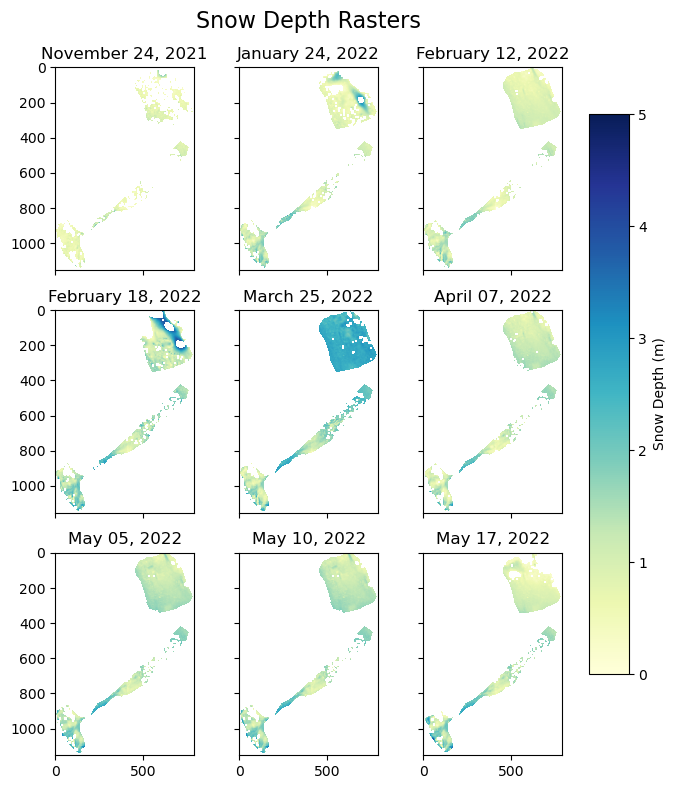

In [25]:
# Plot the histograms of each raster in a 3 x 3 layout for each usable day
fig, axs = plt.subplots(3,3, tight_layout = True, figsize = (8,8), sharey = True, sharex = True)
# Create an overall Figure Title
fig.suptitle('Snow Depth Rasters', fontsize = 16)
# Graph each date on the axis
axs[0,0].imshow(Nov24_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu')
axs[0,0].set_title('November 24, 2021')

axs[0,1].imshow(Jan24_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[0,1].set_title('January 24, 2022')

axs[0,2].imshow(Feb12_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[0,2].set_title('February 12, 2022')

axs[1,0].imshow(Feb18_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[1,0].set_title('February 18, 2022')

axs[1,1].imshow(Mar25_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[1,1].set_title('March 25, 2022')

axs[1,2].imshow(Apr07_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[1,2].set_title('April 07, 2022')

axs[2,0].imshow(May05_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[2,0].set_title('May 05, 2022')

axs[2,1].imshow(May10_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[2,1].set_title('May 10, 2022')

img = axs[2,2].imshow(May17_data[0], vmin = 0, vmax = 5, cmap = 'YlGnBu' )
axs[2,2].set_title('May 17, 2022')


fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(img, cax=cbar_ax, label = 'Snow Depth (m)')


# plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SDepth_Rasters.png')